In [1]:
import pandas as pd
file_path = "Observations 2012-2025.xlsx"
df = pd.read_excel(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Unnamed: 1        0 non-null      float64
 2   Aigrette bleue    86 non-null     object 
 3   Egretta caerulea  86 non-null     object 
 4   Migrateur         85 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.5+ KB


## NOM FRANCAIS

In [20]:
# 定义完整的列名列表
column_names = [
    'Nom_observateur',
    'code_departement', 
    'Nom_transect',
    'date',
    'passage',  # 1er, 2e ou 3e passage
    'nuages',
    'pluie', 
    'vent',
    'visibilite',
    'N_point',
    'heure_debut',
    'ESPECE',
    'dist_25m_Auditif',
    'dist_25m_Visuel',
    'dist_50m_Auditif', 
    'dist_50m_Visuel',
    'dist_100m_Auditif',
    'dist_100m_Visuel',
    'dist_plus100m_Auditif',
    'dist_plus100m_Visuel',
    'vol',
    'total_Auditif',
    'total_Visuel_sans_vol',
    'total_AV_sans_vol',
    'total_AV_avec_vol'
]

In [28]:
obs_data = pd.read_excel(
    file_path,
    sheet_name='NOM FRANÇAIS',
    header=None,      
    skiprows=3,       
    names=column_names,
    index_col=False
)

In [29]:
obs_data.shape

(114495, 25)

In [31]:
obs_data.head()

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0


## ESPECES

In [37]:
# ESPECES表的列名定义
species_column_names = [
    'nom_francais',     # 法语名称 
    'nom_scientifique', # 学名 
    'statut_migratoire' # 迁徙状态 
]

# 读取ESPECES工作表
species_data = pd.read_excel(file_path, sheet_name='ESPECES', header=0, names=species_column_names)

species_data.head()

,nom_francais,nom_scientifique,statut_migratoire
0,Aigrette garzette,Egretta garzetta,Migrateur
1,Aigrette neigeuse,Egretta thula,Migrateur
2,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
3,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme
4,Astrild à joues orange,Estrilda melpoda,NaN


## GPS-MILIEU

In [38]:
# GPS-MILIEU表的列名定义
site_column_names = [
    'transect_name',    # 样线名称 (如 Aéroport)
    'utm_x',           # UTM X坐标 (如 714593)
    'utm_y',           # UTM Y坐标 (如 1614233)
    'habitat_type',    # 栖息地类型 (如 Mangrove)
    'site_id',         # 站点ID (如 S1)
    'point_id'         # 点位ID (如 SIPI, S1P2)
]

In [43]:
site_data = pd.read_excel(file_path, sheet_name='GPS-MILIEU',skiprows=2, names=site_column_names)

In [47]:
site_data.head()

,transect_name,utm_x,utm_y,habitat_type,site_id,point_id
0,Aéroport,714416,1614194,Mangrove,S1,S1P2
1,Aéroport,714133,1614141,Mangrove,S1,S1P3
2,Aéroport,713914,1614103,Mangrove,S1,S1P4
3,Aéroport,713719,1614062,Mangrove,S1,S1P5
4,Aéroport,713559,1614036,Mangrove,S1,S1P6


## 1.1 Overview of the dataset structure

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load and inspect dataset ==========
# 读取观测数据
# obs_data = pd.read_excel(
#     file_path,
#     sheet_name='NOM FRANÇAIS',
#     header=2,
#     names=column_names,
#     index_col=None
# ).dropna(axis=1, how='all')  # 删除空白列

# 打印基本结构信息（表格维度、列名等）
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {obs_data.shape}")
# print(f"Columns: {list(obs_data.columns)}")

# 检查时间范围
obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
time_min, time_max = obs_data['date'].min(), obs_data['date'].max()
print(f"Date range: {time_min.date()} to {time_max.date()}")

# 唯一标识符统计（样线、观察者、物种）
unique_transects = obs_data['Nom_transect'].nunique()
unique_observers = obs_data['Nom_observateur'].nunique()
unique_species = obs_data['ESPECE'].nunique()
print(f"Unique transects: {unique_transects}")
print(f"Unique observers: {unique_observers}")
print(f"Unique species: {unique_species}")



=== Dataset Overview ===
Shape (rows, columns): (114495, 25)
Date range: 2014-03-29 to 2025-07-03
Unique transects: 74
Unique observers: 49
Unique species: 103


## 1.2. Observation effort overview 努力量


## Calculate and visualise observation effort over time and across transects.
## 计算并可视化时间和样线维度上的观测努力量

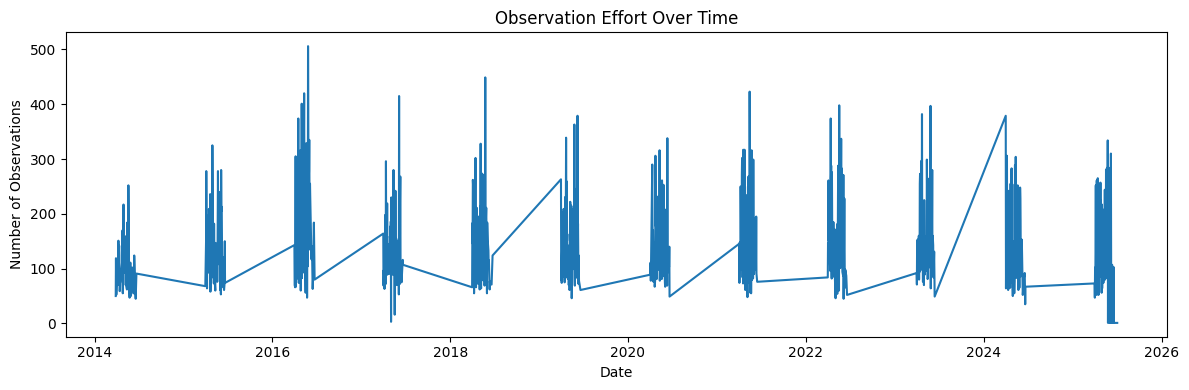

In [53]:
# 2.1 Effort over time (number of observations per day)
# 时间维度上的努力量（每日观测记录数）
effort_by_date = obs_data.groupby('date').size().reset_index(name='n_observations')

plt.figure(figsize=(12, 4))
sns.lineplot(data=effort_by_date, x='date', y='n_observations')
plt.title("Observation Effort Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

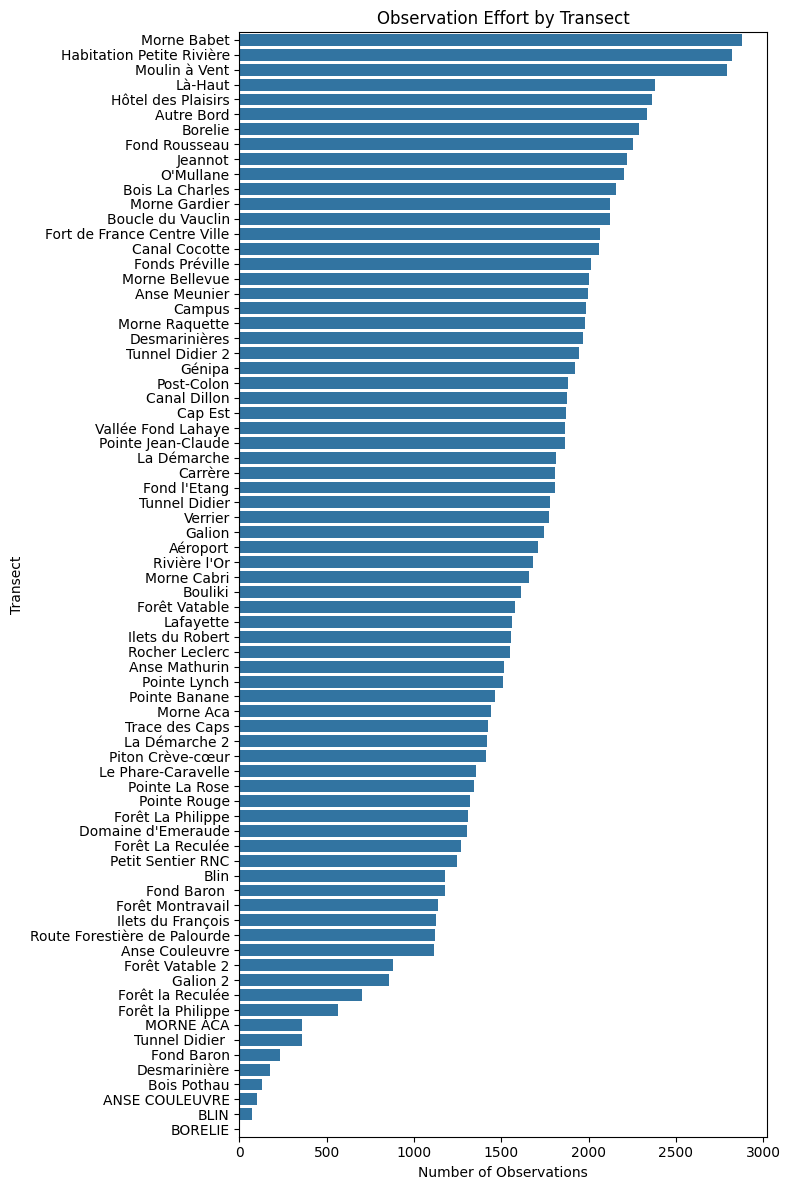

In [55]:
# 2.2 Effort by transect (number of observations per transect)
# 样线维度上的努力量（每条样线观测记录数）
effort_by_transect = obs_data.groupby('Nom_transect').size().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=effort_by_transect.values, y=effort_by_transect.index)
plt.title("Observation Effort by Transect")
plt.xlabel("Number of Observations")
plt.ylabel("Transect")
plt.tight_layout()
plt.show()

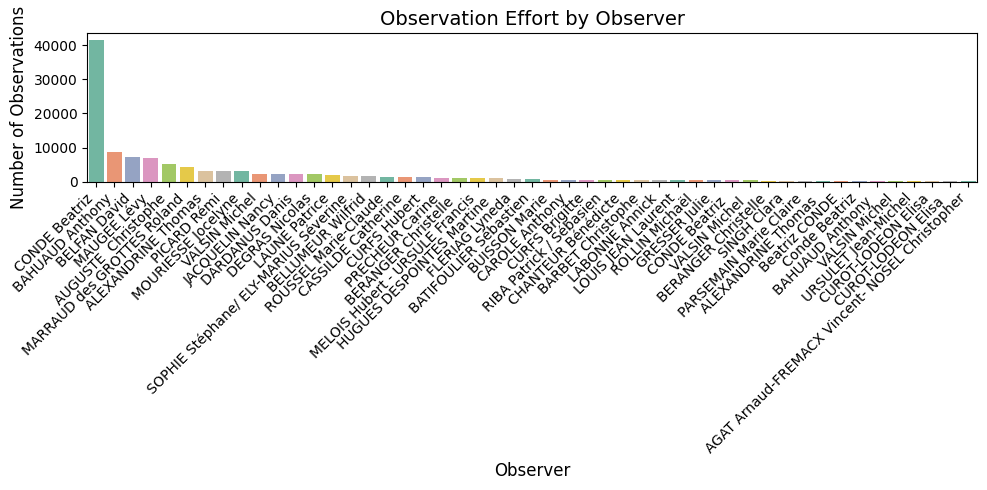

In [68]:
# 2.3 Effort by observer
# 观察者努力量 / 每位观察者观测次数

# 计算每位观察者的观测次数 / Count observations per observer
effort_by_observer = obs_data['Nom_observateur'].value_counts()

# 将 Series 转为 DataFrame / Convert Series to DataFrame
observer_df = effort_by_observer.reset_index()
observer_df.columns = ['Observer', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Observer',
    y='Count',
    data=observer_df,
    hue='Observer',   # 使用 hue 兼容 seaborn 未来版本
    dodge=False,      # 不拆分箱体
    palette="Set2",
    legend=False      # 隐藏图例
)
plt.title("Observation Effort by Observer", fontsize=14)
plt.xlabel("Observer", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
# ## 3. Distribution of species counts
# ## 3. 物种计数分布
# Descriptive statistics for numeric variables related to counts.
# 对计数相关的数值列进行描述性统计

# %%
# Define numeric columns
# 定义数值列 / numeric columns for counts
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert numeric columns
# 转换为数值类型 / convert to numeric
obs_data[count_cols] = obs_data[count_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
# 数值列描述性统计 / descriptive statistics
count_summary = obs_data[count_cols].describe().T
print("=== Descriptive Statistics for Counts===")
count_summary


=== Descriptive Statistics for Counts===


,count,mean,std,min,25%,50%,75%,max
dist_25m_Auditif,58829.0,1.619694,0.960943,0.000000,1.0,1.0,2.0,40.0
dist_25m_Visuel,39190.0,2.011687,2.567085,0.000000,1.0,1.0,2.0,121.0
dist_50m_Auditif,31148.0,1.298831,0.681653,0.000000,1.0,1.0,1.0,23.0
dist_50m_Visuel,5432.0,2.051178,3.573717,0.000000,1.0,1.0,2.0,100.0
dist_100m_Auditif,8402.0,1.235777,0.667929,0.000000,1.0,1.0,1.0,22.0
dist_100m_Visuel,1531.0,1.951012,4.316356,0.000000,1.0,1.0,2.0,150.0
dist_plus100m_Auditif,2648.0,1.305136,3.979901,0.000000,1.0,1.0,1.0,200.0
dist_plus100m_Visuel,1388.0,4.189481,12.844451,0.000000,1.0,1.0,3.0,200.0
vol,1821.0,1.983526,4.056436,0.000000,1.0,1.0,2.0,80.0
total_Auditif,114255.0,1.305836,1.339722,0.000000,1.0,1.0,2.0,200.0


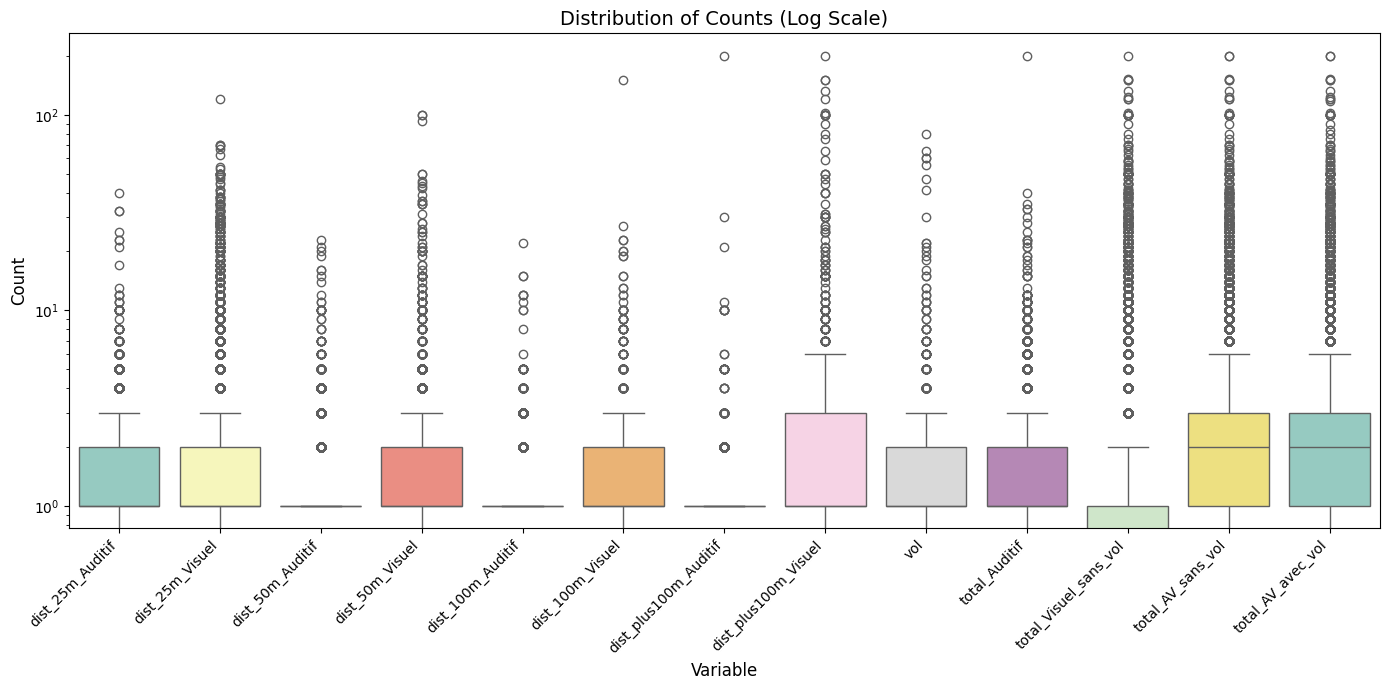

In [60]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [70]:
# ## 4. Weather conditions
# ## 4. 天气条件
# Distribution of environmental descriptors such as clouds, rain, wind, and visibility.
# 天气相关变量（云量、降雨、风力、能见度）的分布

# %%
# Convert weather columns to numeric
# 转换为数值类型 / convert to numeric
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data[weather_cols] = obs_data[weather_cols].apply(pd.to_numeric, errors='coerce')


# Summary statistics
# 描述性统计 / descriptive statistics
weather_summary = obs_data[weather_cols].describe().T
print("=== Weather Conditions Summary / 天气条件描述性统计 ===")
weather_summary

=== Weather Conditions Summary / 天气条件描述性统计 ===


,count,mean,std,min,25%,50%,75%,max
nuages,114493.0,1.968181,0.698651,1.0,1.0,2.0,2.0,3.0
pluie,114494.0,1.029355,0.177576,1.0,1.0,1.0,1.0,3.0
vent,114478.0,1.422885,0.600866,-5.0,1.0,1.0,2.0,3.0
visibilite,114494.0,1.419559,0.619856,1.0,1.0,1.0,2.0,4.0


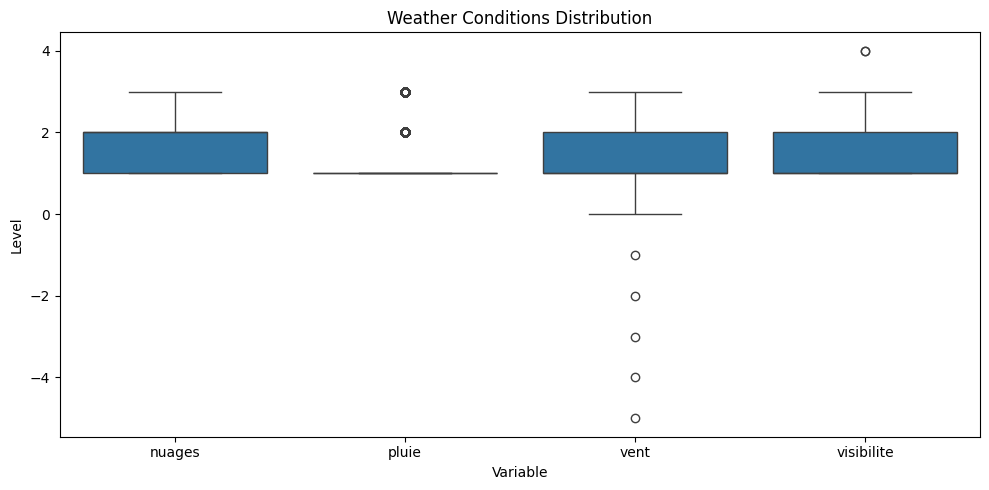

In [71]:
# Boxplot for weather variables
# 天气条件箱线图 / boxplot
plt.figure(figsize=(10, 5))
melted_weather = obs_data[weather_cols].melt(var_name='Variable', value_name='Level')
sns.boxplot(x='Variable', y='Level', data=melted_weather)
plt.title("Weather Conditions Distribution")
plt.ylabel("Level")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

In [74]:
# ## 5. Data Quality Check
# ## 5. 数据质量检查
# Check missing values, negative counts, and duplicates.

# %%
# 5.1 Missing values
# 缺失值 / missing value ratio
missing_pct = obs_data.isnull().mean().sort_values(ascending=False) * 100
# 每列缺失值比例
print("=== Missing value ratio per column (%)===")
print(missing_pct)


=== Missing value ratio per column (%)===
dist_plus100m_Visuel     98.787720
dist_100m_Visuel         98.662824
vol                      98.409538
dist_plus100m_Auditif    97.687235
dist_50m_Visuel          95.255688
dist_100m_Auditif        92.661688
dist_50m_Auditif         72.795319
dist_25m_Visuel          65.771431
dist_25m_Auditif         48.618717
total_Auditif             0.209616
vent                      0.014848
total_AV_sans_vol         0.005240
total_Visuel_sans_vol     0.003494
nuages                    0.001747
code_departement          0.001747
pluie                     0.000873
visibilite                0.000873
Nom_observateur           0.000000
ESPECE                    0.000000
heure_debut               0.000000
N_point                   0.000000
passage                   0.000000
date                      0.000000
Nom_transect              0.000000
total_AV_avec_vol         0.000000
dtype: float64


In [77]:
# 5.2 Negative values
# 负数检测 / check for negative counts
abnormal_counts = {}
for col in count_cols:
    n_neg = (obs_data[col] < 0).sum()
    if n_neg > 0:
        abnormal_counts[col] = n_neg
if abnormal_counts:
    print("Negative values found in columns：", abnormal_counts)
else:
    print("No negative values detected in count columns")


Negative values found in columns： {'total_Visuel_sans_vol': np.int64(4)}


In [78]:
# 5.3 Duplicate entries
# 重复记录 / duplicates
duplicates = obs_data.duplicated(subset=['Nom_transect', 'date', 'N_point', 'ESPECE']).sum()
# 重复记录数
print(f"Duplicate records: {duplicates}")

Duplicate records: 3005


In [79]:
obs_data.duplicated().sum()

np.int64(2243)